In [0]:
## 선형회귀

# 데이터들 사이의 상관관계 또는 추이를 예측하거나, 대상 값 자체를
# 예측하는 지도학습 알고리즘

# 예를 들어, 방의 개수와 집값의 상관 관계 또는 과거 10년간의
# 영업 실적을 분석하여 미래의 영업 실적을 예측하는 것

# 하나의 종속변수와 하나 이상의 독립변수 간의 상관관계를 기본으로
# 하여 하나의 n차 선형방정식으로 변수 관계를 일반화하는 분석방법


# 하나의 독립변수를 통해 
# 종속변수 값을 잘 설명할 수 있으면 단순 선형회귀라 하고, 

# 하나 이상의 독립변수를 통해 
# 종속변수 값을 잘 설명할 수 있으면 다중 선형회귀라 함


## 선형성(Linearity)
# 두 변수의 관계가 하나의 직선의 형태로 
# 설명될 수 있는 관계를 지닌다는 것



## 회귀분석의 중요 개념

# 선형방정식 : 두 변수의 관계를 방정식으로 표현
# 기울기 : 독립변수가 종속변수에 얼마나 영향을 
#          주는지 그 크기와 방향을 파악
# 절편 : 회귀선을 얼마나 위/아래로 평행이동 시키는지 알 수 있음



## 선형회귀 기법

# 일반선형회귀 : 예측값과 실제값의 잔차제곱합 RSS 을
#                최소화하는 회귀계수를 구함, 규제 미적용

# 릿지 회귀 : 일반선형회귀에 L2 규제를 적용
#             즉, 큰 회귀계수의 수치를 감소시킴

# 라쏘 회귀 : 일반선형회귀에 L1 규제를 적용
#             즉, 작은 회귀계수의 수치를 0으로 만듬

# 엘라스틱 회귀 : 일반선형회귀에 L1, L2 규제를 정용


In [0]:
# ex) 공부한 시간 대비 성적 예측을 단순선형회귀로 풀어 봄

# time = 2, 4, 6, 8        (독립변수)
# jumsu = 81, 93, 91, 97   (종속변수)

# 선형방정식은 y = ax + b형태임
# 따라서, 기울기 a 와 절편 b를 구해야 함


# 독립변수와 종속변수의 관계를 그래프로 표현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

plt.plot(x, y, 'ro')
plt.grid(True)
plt.show()



# 회귀계수를 구하기 위해 다양한 방법을 
# 이용할 수 있는데 여기서는 평균제곱오차MES를 이용함

# 기울기 = 총합(x - x평균)(y - y평균) / 총합(x - x평균)^2

# 절편 = y평균 - (x평균 * 기울기)

x_mean = np.mean(x)
y_mean = np.mean(y)


divsor = sum([(i - x_mean) ** 2 for i in x])


def divtop(x, mx, y, my):
  sums = 0
  for i in range(len(x)):
    sums += (x[i] - mx) * (y[i] - my)
  return sums
  
dividen = divtop(x, x_mean, y, y_mean)

a = dividen / divsor
b = y_mean - (x_mean * a)

print('기울기', a)
print('절편', b)


# 예측값을 넣어 회귀선을 그려봄

z = []

for i in x:
  z.append(a*i + b)

print('예측값', z)

plt.plot(x, y, 'ro')
plt.plot(x, z, 'bo-')
plt.show()



In [0]:
## 평균제곱근 오차

# 최소제곱법을 이용해서 회귀직선을 그어 보았지만
# 다양한 상황에 적합한 직선을 긋기에는 부족

# 즉, 여러 개의 변수로 구성된 데이터에 대한 
# 회귀직선을 긋기에는 무리가 있음

# 따라서, 여러 독립변수로 구성된 데이터의 경우
# 임의의 선을 그린 후 이 선의 오차를 평가하고 조금씩
# 수정해 나가는 방법이 필요

# 주어진 선의 오차를 평가하는 방법 : 평균제곱근오차

# 최소제곱법에서는 공식을 이용해서 바로 기울기/절편을 계산
# 한편, 평균제곱근오차에서는 기울기와 절편에 아무값이나 대입하고 
# 오차를 구해서 이 오차를 최소화 하는 방식을 사용

# 오차 평가 방법RMSE
# (실제값 - 예측값)의 제곱합의 제곱근


In [0]:
from sklearn.metrics import mean_squared_error


# 시도 1 : 기울기 = 3, 절편 = 76
a = 3; b = 76

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 2 : 기울기 = 5, 절편 = 76
a = 5; b = 76

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 3 : 기울기 = 1, 절편 = 76
a = 1; b = 76

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 4 : 기울기 = 3, 절편 = 80
a = 3; b = 80

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 시도 5 : 기울기 = 3, 절편 = 70
a = 3; b = 70

z = []
for i in x:
  z.append(a*i + b)
  
plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')
plt.show()

MSE = mean_squared_error(y, z)
print('RMSE', np.sqrt(MSE))



# 따라서, 기울기가 커지면 오차가 커진다 ( 3.3 -> 12.4)
# 또한, 기울기가 작아지면 오차가 커진다 ( 3.3 -> 10.3)
# 즉, 기울기와 오차간의 상관관계가 존재



# 기울기와 오차간의 관계를 그래프로 그려봄
weights = []   # 기울기
loss = []      # 오차
b = 0          # 절편은 편의상 0으로 설정

for w in range(-20, 50):   # 기울기를 -20 ~ 50 으로 설정
  x = np.array([2, 4, 6, 8])
  y = np.array([91, 93, 91, 97])
  pred = w * x + b
  
  weights.append(w)
  loss.append(mean_squared_error(y, pred))
  
plt.plot(weights, loss)
plt.show()
  
  
# 그래프에서 확인하듯이 기울기와 오차의 관계는 이차함수 형태임
# 오차가 가장 작은 부부은? => 그래프 하단의 볼록한 부분

# 기울기를 구하는 방법
# 임의의 점을 선택 > 미분 실시 > 기울기가 0인지 확인 
# => 기울기가 0일때까지 계속 반복 시행
# ==> 미분의 기울기를 이용한 경사하강법을 적용
  
 

In [0]:
# 선형 회귀를 이용한 보스톤 집값 예측 
# 데이터 초기화 및 확인
  
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

df['PRICE'] = boston.target

df.head()
df.describe()
  
  
# 산점도 행렬
from pandas.plotting import scatter_matrix

# ZN, INDUS, NOX, RM, AGE, RAD, PTRATIO, LSTAT, PRICE
smdf = df.iloc[:, [1, 2, 4, 5, 6, 8, 10, 12, 13]]

scatter_matrix(smdf)
plt.show()


import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 8), 
                       ncols = 4, nrows=2)

features = ['ZN', 'INDUS', 'NOX', 'RM', 
            'AGE','RAD', 'PTRATIO', 'LSTAT']
for i, feature in enumerate(features):
  row = int(i/4)
  col = i % 4
  sns.regplot(x=feature, y='PRICE', 
              data=df, ax=ax[row][col])
  
  
# 회귀분석 실시
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = \
train_test_split(boston.data, boston.target, \
                 test_size=0.2, random_state=1907021630)
  
lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)


# 회귀계수 확인 및 회귀모형 평가
print('회귀계수', np.round(lr.coef_, 2))
print('절편', np.round(lr.intercept_, 2))

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE 및 RMSE', np.round(mse, 3), np.round(rmse, 3))

r2 = np.round(r2_score(y_test, pred), 3)
print('R^2', r2)



# 회귀평가 vs 분류평가
#             회귀             분류
# 종속변수y   연속형           범주형
# 손실함수    OLS,MSE          최대우도, 엔트로피 
# 평가        MSE/RMSE/R^2     정확도/정밀도/재현율/F1/ROC/AUC


In [29]:
# 보스톤 집값 데이터를 이용해서
# 10회의 교차검증 회귀분석 실시시 R^2은 얼마인가?

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

boston = load_boston()
lr = LinearRegression()

r2 = cross_val_score(
    lr, boston.data, boston.target, 
    cv = 10, scoring = 'neg_mean_squared_error')

nmse = cross_val_score(
    lr, boston.data, boston.target, 
    cv = 10, scoring = 'neg_mean_squared_error')
# scoring : accuracy, precision, reacall, roc_auc, 

# cross_val_score 로 반환된 값은 음수이므로 부호 변환
rmse = np.sqrt(-1 * nmse)
print('교차검증 RMSE', np.mean(rmse))
print('교차검증 R2', np.mean(r2))




교차검증 RMSE 5.18084567934026
교차검증 R2 -34.705255944524914


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
distance        15 non-null int64
deliverytime    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


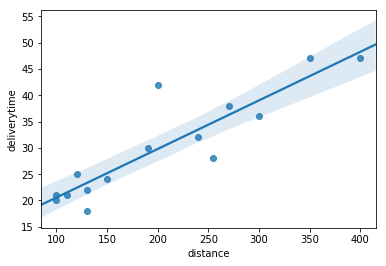

회귀계수 : 기울기 [[0.09415694]]
회귀계수 : 절편 [10.09529604]
RMSE 7.567165245784617
R^2 0.5487233724053457


array([[28.92668341]])

In [53]:
# 배달정보가 담긴 데이터가 다음과 같을때
# 회귀분석을 이용해서 회귀계수/R^2를 구하시오

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

baedal = pd.read_csv('delivery.txt')

baedal.info()
baedal.describe()

sns.regplot(x = 'distance', y = 'deliverytime', data = baedal)

plt.show()



# 회귀분석 실시
# 주의사항 : 데이터는 numpy 배열형태로 되어있어야 함!!!
X = np.array(baedal['distance']).reshape(-1, 1)
y = np.array(baedal['deliverytime']).reshape(-1, 1)

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 1907031045)

lr = LinearRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)


# 회귀계수 확인 및 회귀모형 평가
print('회귀계수 : 기울기', lr.coef_)      # 0.09415694
print('회귀계수 : 절편', lr.intercept_)   # 10.09529604

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('RMSE', np.sqrt(mse))   # 7.5671
print('R^2', r2)              # 0.5487



# 예측하기 - 배달거리가 200m라면 배달시간은?

data = np.array([ [200] ])
lr.predict(data)   # 28.92668341

